# Titanic Veri Seti

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


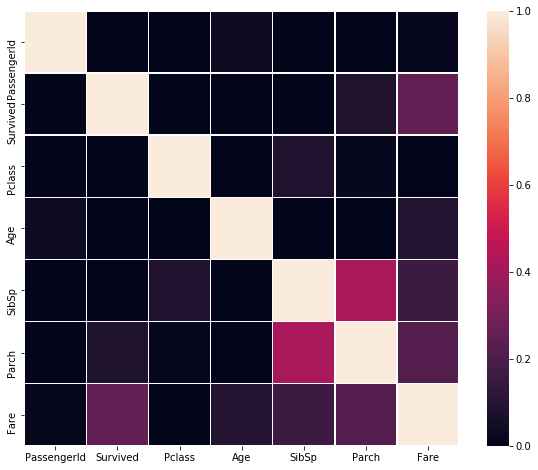

In [9]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,linewidths=.5, vmin=0, vmax=1, square=True)

In [10]:

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [25]:
df[df["Cabin"]=="B57 B59 B63 B66"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [69]:
df["Ticket"].value_counts()

1601                7
347082              7
CA. 2343            7
3101295             6
CA 2144             6
347088              6
382652              5
S.O.C. 14879        5
PC 17757            4
113781              4
113760              4
W./C. 6608          4
4133                4
347077              4
349909              4
LINE                4
17421               4
19950               4
2666                4
363291              3
239853              3
110152              3
24160               3
35273               3
248727              3
345773              3
F.C.C. 13529        3
371110              3
110413              3
PC 17755            3
                   ..
2629                1
STON/O2. 3101282    1
234360              1
2624                1
SC/PARIS 2131       1
111240              1
374746              1
394140              1
330877              1
343120              1
2671                1
347466              1
7553                1
350036              1
A/5. 851  

Cabin kolonu için ilk harfini kullan.
Ticket, Name kolununu drop et.
Kategorik olanlar: Sex, Cabin, Embarked, SibSp, Parch

Pclass train'de yok. Drop et.

In [86]:
data = df.drop(["Cabin", "Name"],axis=1)

Cabin ile Name kolonu çıkarıldı.

In [79]:
from sklearn.preprocessing import LabelEncoder

In [94]:
data["Embarked"].fillna("S", inplace=True)

In [97]:
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["Embarked"] = label_encoder.fit_transform(data["Embarked"])


In [98]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [99]:
data["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64